In [1]:
import sys
import time
import numpy as np
import pickle

In [2]:
max_size = 27
max_length = 26

In [3]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
# with open("./pkls/ignis_hist_list.pkl", "rb") as f:
#     ignis_hist_list = pickle.load(f)
# with open("./pkls/delta_hist_list.pkl", "rb") as f:
#     delta_hist_list = pickle.load(f)
with open("./pkls/lnp_hist_list.pkl", "rb") as f:
    lnp_hist_list = pickle.load(f)
# with open("./pkls/mooney01_hist_list.pkl", "rb") as f:
#     mooney01_hist_list = pickle.load(f)
# with open("./pkls/nation_hist_list.pkl", "rb") as f:
#     nation_hist_list = pickle.load(f)

In [4]:
sys.path.append("../../libs_bell/")
from lib_graph_states import adjacency_list_for_star_graph, list_to_matrix
F_list = [3 * i + 1 for i in range(max_size // 3)] # subset of focused vertices of graph size max_size
Fs = [F_list[:(n+1) // 3] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_star_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
print("max_size:", max_size)
print("F_list:", F_list)

max_size: 27
F_list: [1, 4, 7, 10, 13, 16, 19, 22, 25]


In [5]:
from lib_star_graphs import correlations_of_star_graphs

In [6]:
corr_list, stddev_list, Es_list, Ds_list = correlations_of_star_graphs(adj_lists, raw_hist_list)

graph size: 1
skipped

graph size: 2
first term
second term
total correlation: 2.7051668118147463 

graph size: 3
first term
second term
total correlation: 5.282584839919032 

graph size: 4
first term
second term
total correlation: 7.779210394001027 

graph size: 5
first term
second term
total correlation: 9.792807438864282 

graph size: 6
first term
second term
total correlation: 12.080201201247522 

graph size: 7
first term
second term
total correlation: 13.902175070545088 

graph size: 8
first term
second term
total correlation: 10.449505240532648 

graph size: 9
first term
second term
total correlation: 11.406585317412096 

graph size: 10
first term
second term
total correlation: 14.220856495855235 

graph size: 11
first term
second term
total correlation: 4.156669208351976 

graph size: 12
first term
second term
total correlation: 3.6225411856490513 

graph size: 13
first term
second term
total correlation: 3.9274119316391496 

graph size: 14
first term
second term
total correlati

In [7]:
# ignis_corr_list, ignis_stddev_list, ignis_Es_list, ignis_Ds_list = correlations_of_star_graphs(adj_lists, ignis_hist_list)

In [8]:
# delta_corr_list, delta_stddev_list, delta_Es_list, delta_Ds_list = correlations_of_star_graphs(adj_lists, delta_hist_list)

In [9]:
lnp_corr_list, lnp_stddev_list, lnp_Es_list, lnp_Ds_list = correlations_of_star_graphs(adj_lists, lnp_hist_list)

graph size: 1
skipped

graph size: 2
first term
second term
total correlation: 2.8284271247461903 

graph size: 3
first term
second term
total correlation: 5.624068969409131 

graph size: 4
first term
second term
total correlation: 8.395913323247152 

graph size: 5
first term
second term
total correlation: 10.553198979722884 

graph size: 6
first term
second term
total correlation: 13.248845177370645 

graph size: 7
first term
second term
total correlation: 15.412771950206293 

graph size: 8
first term
second term
total correlation: 11.169539408546381 

graph size: 9
first term
second term
total correlation: 12.384643547399934 

graph size: 10
first term
second term
total correlation: 15.543077606072357 

graph size: 11
first term
second term
total correlation: 2.9747773658623333 

graph size: 12
first term
second term
total correlation: 2.544827085178766 

graph size: 13
first term
second term
total correlation: 3.5448686894293924 

graph size: 14
first term
second term
total correlat

In [10]:
# mooney01_corr_list, mooney01_stddev_list, mooney01_Es_list, mooney01_Ds_list = correlations_of_star_graphs(adj_lists, mooney01_hist_list)

In [11]:
# nation_corr_list, nation_stddev_list, nation_Es_list, nation_Ds_list = correlations_of_star_graphs(adj_lists, nation_hist_list)

## plot correlations

In [12]:
c_bounds = [2 * i for i in range(max_size)]
q_bounds = [2 * np.sqrt(2) * i for i in range(max_size)]

In [13]:
from lib_plots import plot_correlations_lines, cut_corrs_list

In [14]:
corrs_list = [np.array(corr_list), 
              # np.array(ignis_corr_list),
              # np.array(delta_corr_list),
              np.array(lnp_corr_list),
              # np.array(mooney01_corr_list),
              # np.array(nation_corr_list),
             ]
stddevs_list = [np.array(stddev_list),
                # np.array(ignis_stddev_list),
                # np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                # np.array(mooney01_stddev_list),
                # np.array(nation_stddev_list),
               ]

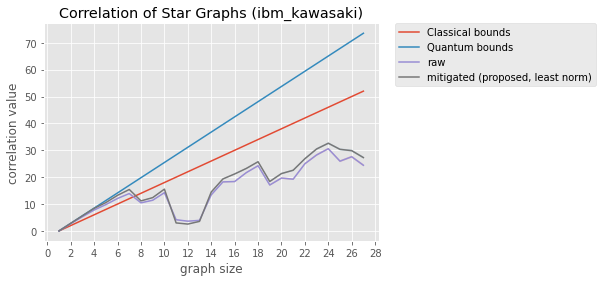

In [15]:
plot_correlations_lines(max_size, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw", 
                         # "mitigated (ignis)", 
                         # "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         # "mitigated (Mooney et al., threshold = 0.1)",
                         # "mitigated (Nation et al., iterative)",
                        ], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Star Graphs (ibm_kawasaki)")

In [16]:
with open("./pkls/corrs_stddevs_list.pkl", "wb") as f:
    pickle.dump([corrs_list, stddevs_list], f)

In [17]:
each_corr_list = [[0]] + [E_1 + Es_2 for E_1, Es_2 in Es_list[1:]]
tp_each_corr_list = []
for i in range(len(each_corr_list)):
    tp_each_corr_list.append([each_corr_list[j][i] for j in range(i, len(each_corr_list))])
# pprint.pprint(tp_each_corr_list)

In [18]:
each_stddev_list = [[0]] + [D_1 + Ds_2 for D_1, Ds_2 in Ds_list[1:]]
tp_each_stddev_list = []
for i in range(len(each_stddev_list)):
    tp_each_stddev_list.append([each_stddev_list[j][i] for j in range(i, len(each_stddev_list))])
# pprint.pprint(tp_each_corr_list)

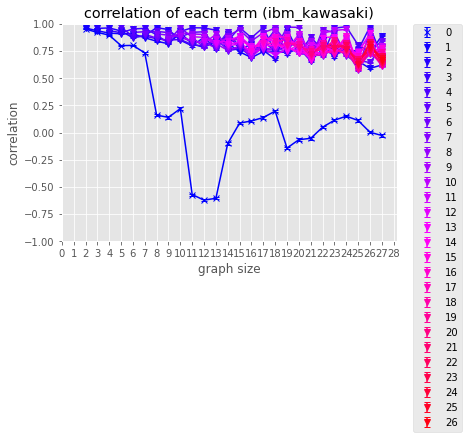

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.clf()
for i, (each_corr, each_stddev) in enumerate(zip(tp_each_corr_list, tp_each_stddev_list)):
    if i == 0:
        plt.plot(list(range(2, max_size + 1)), each_corr[1:], color=[min(1, 2*i/max_size), 0, min(1, 2*(1-i/max_size))])
        plt.errorbar(list(range(2, max_size + 1)), each_corr[1:], label=str(i), color=[min(1, 2*i/max_size), 0, min(1, 2*(1-i/max_size))], fmt="x", yerr=each_stddev[1:], capsize=3)
    else:
        plt.plot(list(range(i+1, max_size + 1)), each_corr, color=[min(1, 2*i/max_size), 0, min(1, 2*(1-i/max_size))])
        plt.errorbar(list(range(i+1, max_size + 1)), each_corr, label=str(i), color=[min(1, 2*i/max_size), 0, min(1, 2*(1-i/max_size))], fmt="v", yerr=each_stddev, capsize=3)
#  plt.plot(list(range(1, max_size + 1)), damped_vibration, label="damped vibration", color=[0, 0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("graph size")
plt.ylabel("correlation")
plt.xticks(list(range(max_size + 2)))
plt.ylim([-1,1])
plt.title("correlation of each term (ibm_kawasaki)")
plt.show()